In [44]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import xarray as xr

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, destagger)


In [10]:
ncfile = Dataset("wrfout_d01_0001-01-01_00-36-00")


In [11]:
ds = xr.open_dataset('wrfout_d01_0001-01-01_00-36-00')

/users/k24109631/miniconda3/envs/data_env/lib/python3.11/site-packages/xarray/coding/times.py:1133: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [41]:
ua = getvar(ncfile, "ua", units="kt")
va = getvar(ncfile, "va", units="kt")

ua.shape

(50, 102, 102)

In [53]:
ds.variables

Frozen({'Times': <xarray.Variable (Time: 1)> Size: 19B
[1 values with dtype=|S19], 'XLAT': <xarray.Variable (Time: 1, south_north: 102, west_east: 102)> Size: 42kB
[10404 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      , 'XLONG': <xarray.Variable (Time: 1, south_north: 102, west_east: 102)> Size: 42kB
[10404 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:      , 'LU_INDEX': <xarray.Variable (Time: 1, south_north: 102, west_east: 102)> Size: 42kB
[10404 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LAND USE CATEGORY
    units:        
    stagger:      , 'ZNU': <xarray.Variable (Time: 1, bottom_top: 50)> Size: 200B
[50 values with dtype=float32]
Attributes:
    FieldType:    104
    

In [67]:
u = ds["NFUEL_CAT"]

#u = destagger(u, stagger_dim=2)

u.shape

(1, 412, 412)

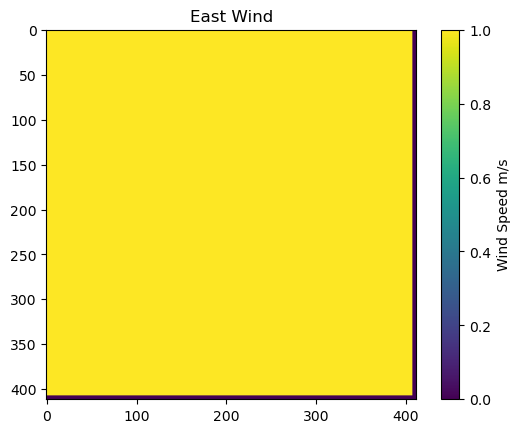

In [68]:
plt.imshow(u[0, :, :])
plt.title("East Wind")
plt.colorbar(label='Wind Speed m/s')
plt.show()

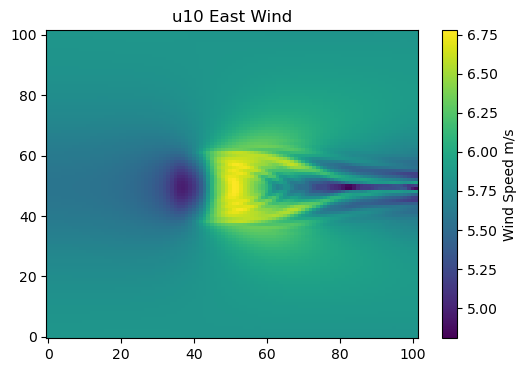

In [52]:
plt.figure(figsize=(6, 4))
plt.imshow(ua[0, :, :], origin='lower', aspect='auto') 
plt.colorbar(label='Wind Speed m/s')
plt.title("u10 East Wind")
plt.show()